In [22]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.linestyle'] = '-'

In [23]:
df = pd.read_csv('D:/python_space/data/Electric_Production.csv')
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


**调整数据格式:**

- 重新定义变量名
- 删除缺失值
- 规范时间数据格式

In [24]:
df.columns = ['Date','Consumption']
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## 将时间序列数据可视化

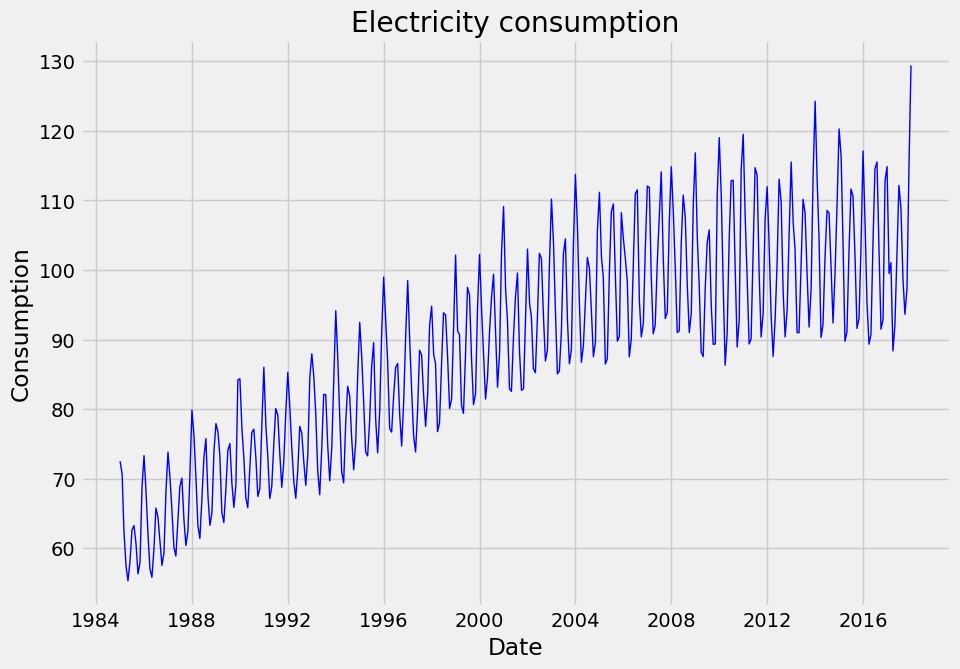

In [25]:
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Electricity consumption')
plt.plot(df, color = 'blue')

<Axes: xlabel='Date'>

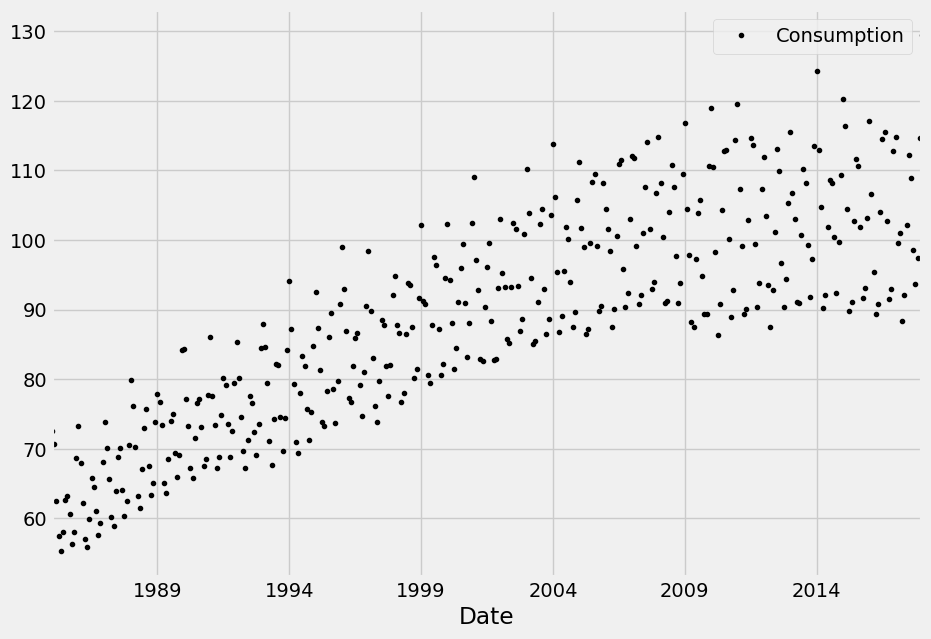

In [26]:
df.plot(style = 'k.')

绘制核密度曲线，检验数据分布形态

(<Axes: title={'center': 'Density plot'}, ylabel='Density'>,
 Text(0.5, 1.0, 'Density plot'))

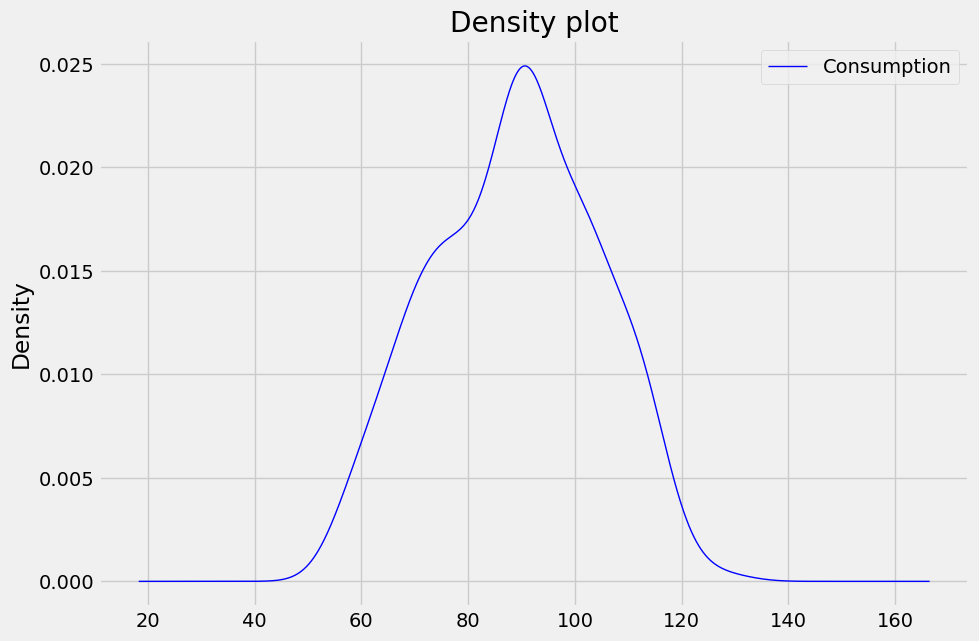

In [27]:
df.plot(kind='kde', color = 'blue'), plt.title('Density plot')

通过核密度曲线可以判断，数据呈正态分布

## 趋势、季节性、残留性分解

时间序列数据可以分为趋势、季节性、残留性。

- 趋势是长期内观察到的基本方向和模式
- 季节性是由于季节因素发生的周期性波动
- 残差是在去除趋势和季节性之后剩下的随机变化

对于理想情况而言，残差应该是随机噪声，因此显著的偏差表明存在异常值，例如与平均残差相差2-3个标准差的数据点可视为异常值。

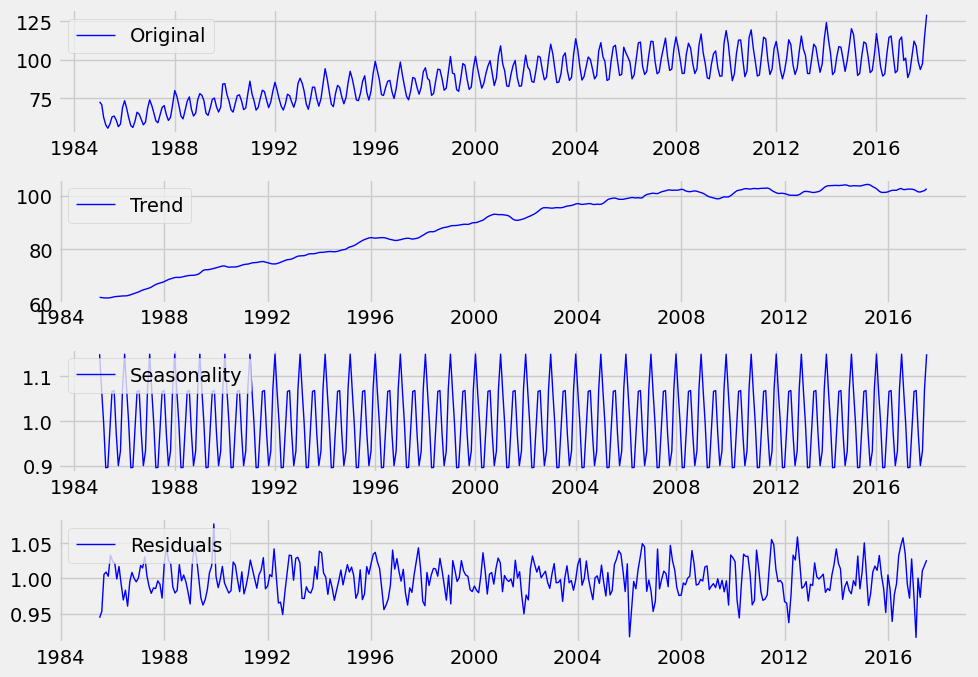

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, axs = plt.subplots(4,1)
axs[0].plot(df, label='Original', color = 'blue')
axs[0].legend(loc='upper left')
axs[1].plot(trend, label='Trend', color = 'blue')
axs[1].legend(loc='upper left')
axs[2].plot(seasonal, label='Seasonality', color = 'blue')
axs[2].legend(loc='upper left')
axs[3].plot(residual, label='Residuals', color = 'blue')
axs[3].legend(loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
mean_resid = residual.mean()
std_resid = residual.std()
threshold = 3*std_resid
outliers = []
for i in residual.index:
    if residual[i] > mean_resid + threshold or residual[i] < mean_resid - threshold:
        outliers.append(i)
print(outliers)

[Timestamp('1989-12-01 00:00:00'), Timestamp('2006-01-01 00:00:00'), Timestamp('2017-02-01 00:00:00')]


## 异常值提取
下图为异常值与源数据&残差图对照

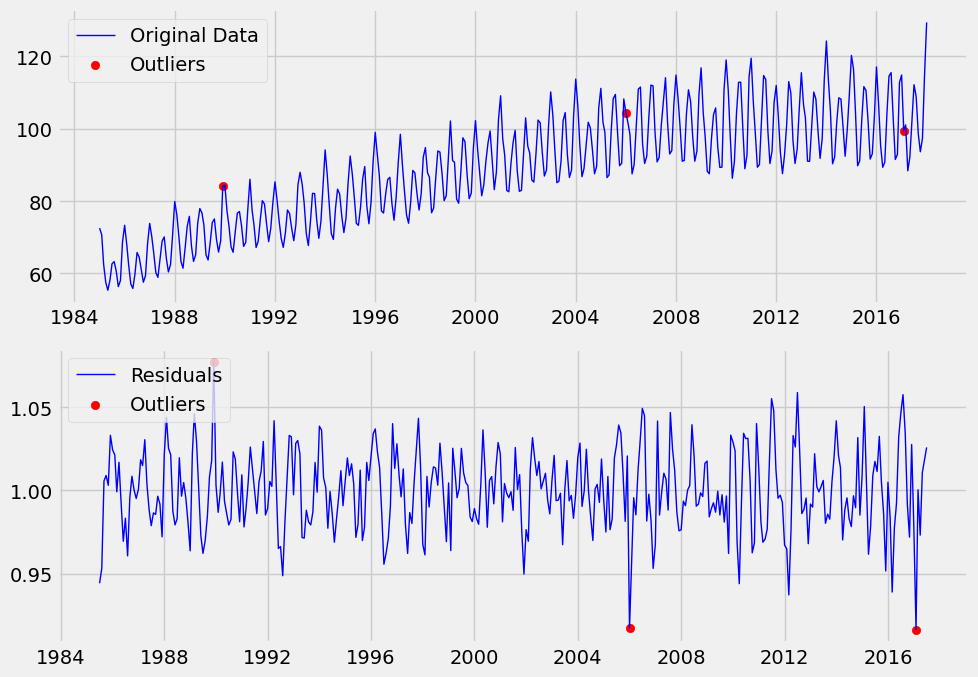

In [30]:
fig, axs = plt.subplots(2,1)
outliers_data = df.loc[outliers]
axs[0].plot(df, label = 'Original Data', color = 'blue')
axs[0].scatter(outliers_data.index, outliers_data, color = 'red', label = 'Outliers')
axs[0].legend(loc = 'upper left')
residual_outliers = residual.loc[outliers]
axs[1].plot(residual, label = 'Residuals', color = 'blue')
axs[1].scatter(residual_outliers.index, residual_outliers, color = 'red', label = 'Outliers')
axs[1].legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [34]:
print('电能消耗数据中异常值信息如下')
print(outliers_data)

电能消耗数据中异常值信息如下
            Consumption
Date                   
1989-12-01      84.1949
2006-01-01     104.4724
2017-02-01      99.4901
